In [7]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_html(url):
    _html = ""
    resp = requests.get(url)
    if resp.status_code == 200:
        _html = resp.text
    return _html


URL = "http://finance.naver.com/sise/entryJongmok.nhn?&page=1"
html = get_html(URL)
soup = BeautifulSoup(html, 'html.parser')
soup


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>네이버 금융</title>
<link href="/css/newstock.css?20190411143845" rel="stylesheet" type="text/css"/>
<link href="/css/common.css?20190411143845" rel="stylesheet" type="text/css"/>
<link href="/css/layout.css?20190411143845" rel="stylesheet" type="text/css"/>
<link href="/css/main.css?20190411143845" rel="stylesheet" type="text/css"/>
<link href="/css/newstock2.css?20190411143845" rel="stylesheet" type="text/css"/>
<link href="/css/newstock3.css?20190411143845" rel="stylesheet" type="text/css"/>
<link href="/css/world.css?20190411143845" rel="stylesheet" type="text/css"/>
</head>
<body>
<!-- 편입종목 상위 -->
<div class="box_type_m">
<h4 class="top_tlt" style="text-align:left;"><em>편입종목</em>상위</h4>
<table cellpadding="0" cellspacing="0" class="type_1" style="”table-layout:fixed;”">
<col width="119"/><col width="69"/><col width="79"/><col width=

([<matplotlib.axis.XTick at 0x1ea0530ec50>,
 <a list of 5 Text xticklabel objects>)

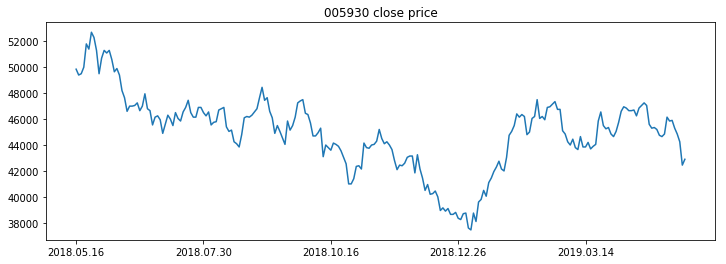

In [8]:
target_n=240
ddate=[]
closeprice=[]
for j in range(int(target_n/10)):  #한 페이지에 10개씩이므로, 탐색 기간만큼 
    URL="http://finance.naver.com/item/sise_day.nhn?code=005930&page="+str(j+1)
    html=get_html(URL)
    soup=BeautifulSoup(html, 'html.parser')
    meta=soup('tr',{'onmouseover':'mouseOver(this)'})
    for t,tt in enumerate(meta):
        meta_text=str(tt)
        ddate.append(meta_text.split('gray03">')[1].split('</span')[0])
        closeprice.append(int(meta_text.split('p11">')[1].split('</span')[0].replace(',','')))


ddate=np.array(ddate[::-1])
closeprice=np.array(closeprice)
ticks=[0,50,100,150,200]
#print (ddate)
#print (closeprice)

plt.figure(figsize=(12,4))
plt.title('005930 close price')
plt.plot(closeprice[::-1])
plt.xticks(ticks, ddate[ticks])
#plt.yticks(ticks)

([<matplotlib.axis.XTick at 0x1ea06545ac8>,
 <a list of 10 Text xticklabel objects>)

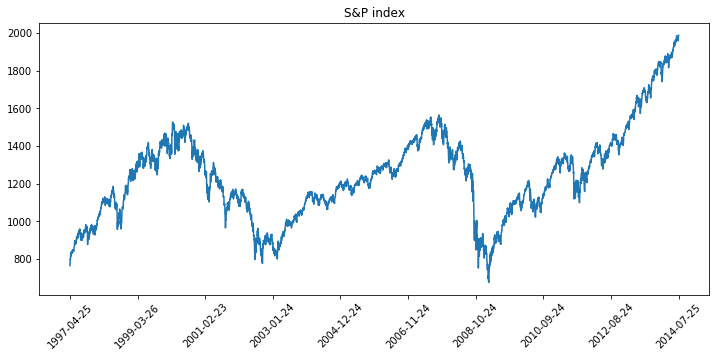

In [12]:
df=pd.read_csv('S&P_index(PI).csv').set_index('Date')
ticks1=[0,500,1000,1500,2000,2500,3000,3500,4000,4500]
plt.figure(figsize=(12,5))
plt.title('S&P index')
plt.plot(range(len(df[:4500])),df[:4500])
plt.xticks(ticks1,df.index[ticks1],rotation=45)